# 1. Equipe do Laboratório

- Gabriel Telles Missailidis

- João Lucas Rocha Rolim

- Samir Nunes da Silva

# 2.1. Problema Encontrar Caminho

### 2.1.1 Modelagem e Implementação

In [1]:
import numpy as np
from typing import Self
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import time

In [2]:
class Grid:
    def __init__(self):
        """
        Inicializa a classe Grid com uma matriz vazia.
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            Nenhum retorno.
        """
        self._matrix = None
        
    def __str__(self):
        """
        Retorna a representação em string da matriz.
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            str: Representação da matriz em forma de string.
        """
        return str(self._matrix)
    
    def at(self, i: int, j: int):
        """
        Retorna o valor na posição (i, j) da matriz.
        
        Args:
            i (int): Índice da linha.
            j (int): Índice da coluna.
            
        Returns:
            Elemento da matriz na posição (i, j).
        """
        return self._matrix[i, j]
    
    def shape(self):
        """
        Retorna a forma da matriz (número de linhas e colunas).
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            tuple: Dimensões da matriz (linhas, colunas) ou None se a matriz não foi inicializada.
        """
        return self._matrix.shape if self._matrix is not None else None
    
    def as_matrix(self):
        """
        Retorna a matriz completa.
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            numpy.matrix: A matriz completa.
        """
        return self._matrix
    
    def plot(self):
        """
        Plota a matriz usando um mapa de calor com um colormap personalizado.
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            Nenhum retorno.
        """
        custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['black', 'white'])
        sns.heatmap(self._matrix, cmap=custom_cmap)
        plt.show()

    def build(self, matrix: list[list]):
        """
        Constrói a matriz a partir de uma lista de listas.
        
        Args:
            matrix (list[list]): Uma lista de listas que representa a matriz.
            
        Returns:
            Grid: A instância da própria classe para permitir o encadeamento de métodos.
        """
        self._matrix = np.matrix(matrix)
        return self

    def is_valid_position(self, i: int, j: int) -> bool:
        """
        Verifica se a posição (i, j) é válida na matriz.
        
        Args:
            i (int): Índice da linha.
            j (int): Índice da coluna.
            
        Returns:
            bool: True se a posição é válida e não é uma parede, False caso contrário.
        """
        is_wall = lambda i, j: not self._matrix[i, j]
        n_rows = self._matrix.shape[0]
        n_cols = self._matrix.shape[1]
        is_inside = (0 <= i < n_rows) and (0 <= j < n_cols)
        return is_inside and not is_wall(i, j) if is_inside else is_inside

In [3]:
class GreedySearch:       
    def __init__(self):
        """
        Inicializa a classe GreedySearch com variáveis padrão.
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            Nenhum retorno.
        """
        self.position = None
        self.initial_position = None
        self.destiny = None
        self.solution = None
        self.path_cost = 0
        self._moves = (
            np.array([-1, 0]), 
            np.array([1, 0]), 
            np.array([0, 1]), 
            np.array([0, -1])
        )
        
    def plot(self) -> None:
        """
        Plota a solução da busca se ela existir.
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            Nenhum retorno.
        """
        if self.solution is not None:
            self.solution.plot()
    
    def solve(self, 
              grid: Grid, 
              initial_position: np.ndarray[int, int],
              destiny: np.ndarray[int, int], 
              max_iter: int = 100) -> Self:
        """
        Resolve o problema de busca no grid usando o algoritmo Greedy.
        
        Args:
            grid (Grid): O grid onde a busca será realizada.
            initial_position (np.ndarray[int, int]): A posição inicial da busca.
            destiny (np.ndarray[int, int]): A posição de destino.
            max_iter (int, opcional): O número máximo de iterações permitidas. Default é 100.
            
        Returns:
            GreedySearch: A instância da classe com a solução encontrada.
        """
        
        assert grid.is_valid_position(*initial_position) \
            and grid.is_valid_position(*destiny)

        self.position = np.array(initial_position)
        self.initial_position = initial_position
        self.destiny = np.array(destiny)
        path = np.matrix(np.zeros(grid.shape(), dtype=float))
        path[*self.position] = True
        stack = [np.copy(self.position)]

        while not np.array_equal(self.position, destiny) and self.path_cost < max_iter:
            best_loss = np.inf
            best_position = None
            for move in self._moves:
                position = self.position + move
                if grid.is_valid_position(*position) and not path[*position]:
                    loss = GreedySearch.position_loss(position, destiny)
                    if loss < best_loss:
                        best_loss = loss
                        best_position = position
                        
            if best_loss is np.inf: # não achou caminho sendo greedy e sem voltar atrás.
                self.position = stack.pop()
            else:
                stack.append(np.copy(self.position))
                self.position = best_position
            
            path[*self.position] = True
            self.path_cost += 1

        self.solution = Grid().build(np.where(path == 1, 1/2, grid.as_matrix()))
        return self
        
    @staticmethod
    def position_loss(position: np.ndarray[int, int], destiny: np.ndarray[int, int]) -> float:
        """
        Calcula a função de custo para posição atual em relação ao destino com base na distância euclidiana.
        
        Args:
            position (np.ndarray[int, int]): A posição atual.
            destiny (np.ndarray[int, int]): A posição de destino.
            
        Returns:
            float: A perda calculada como a distância euclidiana entre a posição atual e o destino.
        """
        return np.linalg.norm(np.array(position) - np.array(destiny))

### 2.1.2 Solução

Situação:



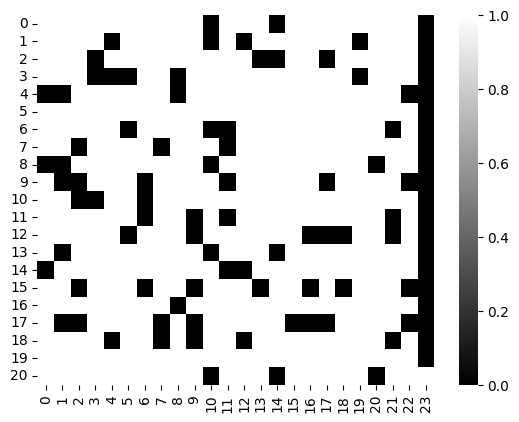



Solução:

Posição Inicial: [0 0]
Destino: [20 23]
Tempo da solução: 0.001996278762817383 s
Custo do caminho: 47


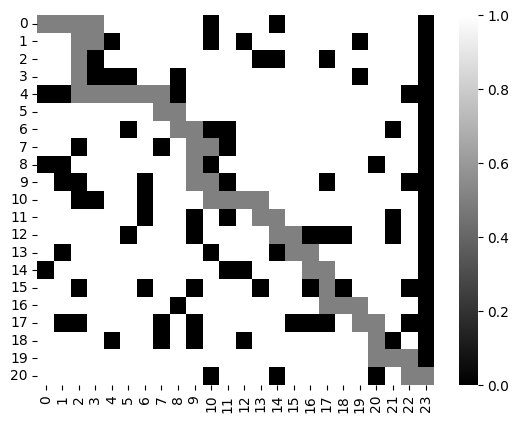

In [4]:
grid = Grid().build([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
])

print("Situação:\n")
grid.plot()

initial_position = np.array((0, 0))
destiny = np.array((grid.shape()[0] - 1, grid.shape()[1] - 1))
start_time = time.time()
agent = GreedySearch().solve(grid, initial_position, destiny, max_iter=100)
end_time = time.time()
print("\n\nSolução:\n")
print(f"Posição Inicial: {agent.initial_position}")
print(f"Destino: {agent.destiny}")
print(f"Tempo da solução: {end_time - start_time} s")
print(f"Custo do caminho: {agent.path_cost}")
agent.plot()

# 2.2. Problema do Sudoku

### 2.2.1 Modelagem e Implementação

In [5]:
import numpy as np
from typing import Self
from copy import deepcopy
from collections import Counter
import time

In [6]:
class SudokuBoard:
    
    VALID_POSITIONS = list(range(0, 9))
    VALID_NUMBERS = set(list(range(1, 10)))
    
    def __init__(self):
        """
        Inicializa a classe SudokuBoard com um tabuleiro vazio (matriz 9x9 de zeros).
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            Nenhum retorno.
        """
        self._board = np.matrix(np.zeros((9,9), np.int64))
        
    def __str__(self):
        """
        Retorna a representação em string do tabuleiro de Sudoku.
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            str: Representação visual do tabuleiro de Sudoku.
        """
        rows = []
        rows.append('#+------+-------+------+')
        for i in SudokuBoard.VALID_POSITIONS:
            row = []
            for e in self._board[i, :].A1: 
                if e == 0:
                    row.append(' ')
                else:
                    row.append(str(e))
                    
            row.insert(3, '|')
            row.insert(7, '|')
            rows.append('#|'+' '.join(row)+'|')

            if i == 2 or i == 5 or i == 8:
                rows.append('#+------+-------+------+')

        return '\n'.join(rows)
    
    def at(self, row, col):
        """
        Retorna o valor na posição (row, col) do tabuleiro.
        
        Args:
            row (int): Índice da linha.
            col (int): Índice da coluna.
            
        Returns:
            int: Valor na posição especificada.
        """
        return self._board[row, col]
    
    def as_matrix(self):
        """
        Retorna o tabuleiro como matrix do Numpy.
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            np.matrix: A matriz 9x9 do tabuleiro de Sudoku.
        """
        return self._board
    
    def set(self, row, col, value):
        """
        Define um valor na posição especificada do tabuleiro.
        
        Args:
            row (int): Índice da linha.
            col (int): Índice da coluna.
            value (int): Valor a ser inserido (deve ser entre 1 e 9).
            
        Returns:
            bool: True se a posição foi definida corretamente, False caso contrário.
        """
        if row >= 0 and row < 9 and col >= 0 and col < 9:
            self._board[row, col] = value
            return True
        return False
    
    def set_all(self, values):
        """
        Define múltiplos valores no tabuleiro.
        
        Args:
            values (list[tuple[int, int, int]]): Lista de tuplas contendo linha, coluna e valor.
            
        Returns:
            Nenhum retorno.
        """
        for value in values:
            self.set(value[0], value[1], value[2])
    
    def is_solved(self):
        """
        Verifica se o tabuleiro de Sudoku está resolvido.
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            bool: True se o tabuleiro estiver corretamente resolvido, False caso contrário.
        """        
        rows_ok, cols_ok, squares_ok = self.solution_status()
        return rows_ok.all() and cols_ok.all() and squares_ok.all()
    
    def solution_status(self):
        """
        Verifica o status da solução do tabuleiro, validando linhas, colunas e quadrados 3x3.
        
        Args:
            Nenhum argumento necessário.
            
        Returns:
            tuple[np.ndarray, np.ndarray, np.ndarray]: Arrays booleanos indicando se as linhas, 
            colunas e quadrados estão corretos, respectivamente.
        """
        rows_ok = np.apply_along_axis(
            SudokuBoard.check_1D, 
            axis=1, 
            arr=np.asarray(self._board)
        ).flatten()
        
        cols_ok = np.apply_along_axis(
            SudokuBoard.check_1D,
            axis=0,
            arr=np.asarray(self._board) 
        ).flatten()
        
        squares_ok = SudokuBoard.check_squares(self._board)
        
        return rows_ok, cols_ok, squares_ok
    
    @staticmethod
    def square_positions(square: int):
        """
        Retorna as posições de linha e coluna correspondentes ao quadrado 3x3 especificado.
        
        Args:
            square (int): Índice do quadrado (de 0 a 8).
            
        Returns:
            tuple[range, range]: Intervalos das linhas e colunas do quadrado 3x3.
        """
        rows = range(3 * int(square/3), 3 * (1 + int(square/3)))
        cols = range(3 * (square % 3), 3 * (1 + (square % 3))) 
        return rows, cols
    
    @staticmethod
    def check_1D(row_or_col):
        """
        Verifica se uma linha ou coluna contém todos os números válidos de 1 a 9.
        
        Args:
            row_or_col (np.ndarray): Linha ou coluna do tabuleiro de Sudoku.
            
        Returns:
            bool: True se a linha ou coluna contém todos os números de 1 a 9, False caso contrário.
        """
        return set(row_or_col) == SudokuBoard.VALID_NUMBERS
    
    @staticmethod
    def check_squares(board):
        """
        Verifica se todos os quadrados 3x3 contêm todos os números válidos de 1 a 9.
        
        Args:
            board (np.matrix): Matriz do tabuleiro de Sudoku.
            
        Returns:
            np.ndarray: Array booleano indicando se cada quadrado está correto.
        """
        squares_ok = np.empty(9)
        for square in SudokuBoard.VALID_POSITIONS:
            rows, cols = SudokuBoard.square_positions(square)
            sub_board = board[rows, :][:, cols]
            squares_ok[square] = set(sub_board.A1) == SudokuBoard.VALID_NUMBERS
        return squares_ok.astype(bool)

In [7]:
class SudokuSolver:
    def __init__(self, T_init=200, T_min=-np.inf, alpha=1.1, max_steps=10000, random_state=0):
        """
        Inicializa a classe SudokuSolver com parâmetros para a resolução utilizando o algoritmo de têmpera simulada (simulated annealing).

        Args:
            T_init (float): Temperatura inicial para o processo de recozimento. Padrão é 200.
            T_min (float): Temperatura mínima para parar o processo. Padrão é -∞.
            alpha (float): Fator de resfriamento multiplicativo. Padrão é 1.1.
            max_steps (int): Número máximo de passos permitidos para a solução. Padrão é 10000.
            random_state (int): Semente para geração de números aleatórios. Padrão é 0.

        Returns:
            Nenhum retorno.
        """
        self.steps = 0
        self.T_init = T_init
        self.T = T_init
        self.T_min = T_min
        self.alpha = alpha
        self.max_steps = max_steps
        self.random_state = np.random.RandomState(random_state)
        self.solution = None
        self.original_board = None

    def solve(self, board: SudokuBoard) -> Self:
        """
        Resolve o Sudoku.

        Args:
            board (SudokuBoard): O tabuleiro de Sudoku a ser resolvido.

        Returns:
            Self: A instância da classe SudokuSolver com a solução encontrada.
        """
        self.original_board = deepcopy(board)
        self.solution = deepcopy(board)
        if self.solution.is_solved():
            return self
        self._initial_fill()
        while True:
            self._simulated_annealing_step()
            self._temperature_scheduling()
            if (
                self.solution.is_solved()
                or self.T < self.T_min
                or self.steps > self.max_steps
            ):
                self._print_info()
                return self

    def _print_info(self):
        """
        Imprime informações sobre o estado atual da solução, incluindo passo, energia e temperatura.

        Args:
            Nenhum argumento necessário.

        Returns:
            Nenhum retorno.
        """
        print(f"Número de Passos do Simulated Annealing: {self.steps}")
        print(f"Energia: {SudokuSolver.board_energy(self.solution)}")
        print(f"Temperatura: {self.T}")
        rows_ok, cols_ok, squares_ok = self.solution.solution_status()
        print(f"Linhas OK: {rows_ok}")
        print(f"Colunas OK: {cols_ok}")
        print(f"Quadrados OK: {squares_ok}")

    def _initial_fill(self):
        """
        Realiza o preenchimento inicial do tabuleiro de Sudoku com números válidos.
        Completa todos os quadrados com todos os números.

        Args:
            Nenhum argumento necessário.

        Returns:
            Nenhum retorno.
        """
        for square in SudokuBoard.VALID_POSITIONS:
            rows = range(3 * int(square / 3), 3 * (1 + int(square / 3)))
            cols = range(3 * (square % 3), 3 * (1 + (square % 3)))
            for row in rows:
                for col in cols:
                    if self.solution.at(row, col) == 0:
                        sub_board = self.solution.as_matrix()[rows, :][:, cols]
                        self.solution.set(
                            row,
                            col,
                            list(
                                set(list(SudokuBoard.VALID_NUMBERS)).difference(
                                    set(sub_board.A1)
                                )
                            )[0],
                        )

    def _simulated_annealing_step(self):
        """
        Realiza um passo de simulação alterando a solução atual para um vizinho se for favorável.

        Args:
            Nenhum argumento necessário.

        Returns:
            Nenhum retorno.
        """
        neighbor = self._generate_neighbor()
        delta_energy = SudokuSolver.board_energy(neighbor) - SudokuSolver.board_energy(
            self.solution
        )
        self.steps += 1
        if delta_energy < 0:
            self.solution = neighbor
            return
        else:
            r = self.random_state.uniform(0, 1, 1)
            if r < np.exp(-delta_energy / self.T):
                self.solution = neighbor
                return

    def _generate_neighbor(self):
        """
        Gera um vizinho da solução atual trocando dois números aleatórios no mesmo quadrado 3x3 escolhido aleatoriamente.

        Args:
            Nenhum argumento necessário.

        Returns:
            SudokuBoard: Um novo estado vizinho da solução atual.
        """
        neighbor = deepcopy(self.solution)
        square = self.random_state.choice(SudokuBoard.VALID_POSITIONS)
        rows, cols = SudokuBoard.square_positions(square)
        row1, row2 = self.random_state.choice(rows, 2)
        col1, col2 = self.random_state.choice(cols, 2)
        while (
            (row1, col1) == (row2, col2)
            or self.original_board.at(row1, col1)
            or self.original_board.at(row2, col2)
        ):
            row1, row2 = self.random_state.choice(rows, 2)
            col1, col2 = self.random_state.choice(cols, 2)
        value1 = neighbor.at(row1, col1)
        value2 = neighbor.at(row2, col2)
        neighbor.set(row1, col1, value2)
        neighbor.set(row2, col2, value1)
        return neighbor

    def _temperature_scheduling(self):
        """
        Ajusta a temperatura atual multiplicando pelo fator alpha para o próximo passo.

        Args:
            Nenhum argumento necessário.

        Returns:
            Nenhum retorno.
        """
        self.T = self.alpha * self.T

    @staticmethod
    def board_energy(board: SudokuBoard):
        """
        Calcula a energia do tabuleiro de Sudoku, onde uma menor energia indica um caso melhor.

        Args:
            board (SudokuBoard): O tabuleiro de Sudoku para o qual calcular a energia.

        Returns:
            float: A energia total do tabuleiro.
        """
        matrix = board.as_matrix()

        rows_energies = np.apply_along_axis(
            SudokuSolver.score_1D, axis=0, arr=np.asarray(matrix)
        ).flatten()

        cols_energies = np.apply_along_axis(
            SudokuSolver.score_1D, axis=1, arr=np.asarray(matrix)
        ).flatten()

        return (
            rows_energies.sum()
            + cols_energies.sum()
            + SudokuSolver.score_squares(matrix)
        )

    @staticmethod
    def score_1D(row_or_col):
        """
        Calcula a pontuação de uma linha ou coluna.

        Args:
            row_or_col (np.ndarray): Linha ou coluna do tabuleiro de Sudoku.

        Returns:
            int: A pontuação da linha ou coluna.
        """
        count = Counter(list(row_or_col))
        score = 0
        for value, freq in count.items():
            if value != 0 and freq == 1:
                score -= 1
        return score

    @staticmethod
    def score_squares(matrix):
        """
        Calcula a pontuação para todos os quadrados 3x3 do tabuleiro.

        Args:
            matrix (np.ndarray): Matriz do tabuleiro de Sudoku.

        Returns:
            int: A pontuação total para todos os quadrados 3x3.
        """
        score = 0
        for square in SudokuBoard.VALID_POSITIONS:
            rows, cols = SudokuBoard.square_positions(square)
            sub_matrix = matrix[rows, :][:, cols]
            count = Counter(list(sub_matrix.A1))
            for value, freq in count.items():
                if value != 0 and freq == 1:
                    score -= 1
        return score

### 2.2.2 Soluções para 4 jogos

In [8]:
board = SudokuBoard()
board.set_all([
    [0,2,5],[0,1,3],[1,3,8],
    [3,1,1],[4,6,3],[4,0,4],
    [5,2,7],[6,1,2],[7,0,8]
])
print("Situação inicial:\n")
print(board)
print("\nSolução:\n")
agent = SudokuSolver(T_init=0.5, T_min=0, alpha=0.99999, max_steps=np.inf)
start_time = time.time()
agent = agent.solve(board)
end_time = time.time()
print(f"Tempo da solução: {end_time - start_time} s")
print(agent.solution)

Situação inicial:

#+------+-------+------+
#|  3 5 |       |      |
#|      | 8     |      |
#|      |       |      |
#+------+-------+------+
#|  1   |       |      |
#|4     |       | 3    |
#|    7 |       |      |
#+------+-------+------+
#|  2   |       |      |
#|8     |       |      |
#|      |       |      |
#+------+-------+------+

Solução:

Número de Passos do Simulated Annealing: 5114
Energia: -243
Temperatura: 0.47507269893861837
Linhas OK: [ True  True  True  True  True  True  True  True  True]
Colunas OK: [ True  True  True  True  True  True  True  True  True]
Quadrados OK: [ True  True  True  True  True  True  True  True  True]
Tempo da solução: 8.370076417922974 s
#+------+-------+------+
#|6 3 5 | 2 4 1 | 7 8 9|
#|2 4 9 | 8 7 6 | 1 3 5|
#|7 8 1 | 5 3 9 | 2 6 4|
#+------+-------+------+
#|5 1 2 | 7 6 3 | 9 4 8|
#|4 6 8 | 9 5 2 | 3 7 1|
#|3 9 7 | 1 8 4 | 5 2 6|
#+------+-------+------+
#|1 2 6 | 3 9 8 | 4 5 7|
#|8 5 3 | 4 1 7 | 6 9 2|
#|9 7 4 | 6 2 5 | 8 1 3|
#+------+

In [9]:
board = SudokuBoard()
board.set_all([
    [0,0,2],[0,7,5],[0,3,3],[0,8,4],[0,6,1],
    [1,4,9],[3,5,2],[4,9,8],[5,7,3],[8,1,4]
])
print("Situação inicial:\n")
print(board)
print("\nSolução:\n")
agent = SudokuSolver(T_init=0.5, T_min=0, alpha=0.99999, max_steps=np.inf)
start_time = time.time()
agent = agent.solve(board)
end_time = time.time()
print(f"Tempo da solução: {end_time - start_time} s")
print(agent.solution)

Situação inicial:

#+------+-------+------+
#|2     | 3     | 1 5 4|
#|      |   9   |      |
#|      |       |      |
#+------+-------+------+
#|      |     2 |      |
#|      |       |      |
#|      |       |   3  |
#+------+-------+------+
#|      |       |      |
#|      |       |      |
#|  4   |       |      |
#+------+-------+------+

Solução:

Número de Passos do Simulated Annealing: 1429
Energia: -243
Temperatura: 0.4929057734998883
Linhas OK: [ True  True  True  True  True  True  True  True  True]
Colunas OK: [ True  True  True  True  True  True  True  True  True]
Quadrados OK: [ True  True  True  True  True  True  True  True  True]
Tempo da solução: 2.823899269104004 s
#+------+-------+------+
#|2 7 9 | 3 8 6 | 1 5 4|
#|8 1 3 | 4 9 5 | 7 2 6|
#|5 6 4 | 1 2 7 | 9 8 3|
#+------+-------+------+
#|7 3 8 | 6 4 2 | 5 1 9|
#|4 9 1 | 7 5 3 | 8 6 2|
#|6 2 5 | 8 1 9 | 4 3 7|
#+------+-------+------+
#|1 5 2 | 9 3 4 | 6 7 8|
#|9 8 6 | 2 7 1 | 3 4 5|
#|3 4 7 | 5 6 8 | 2 9 1|
#+------+-

In [10]:
board = SudokuBoard()
board.set_all([
    [0, 0, 5], [0, 1, 3], [0, 4, 7], 
    [1, 0, 6], [1, 3, 1], [1, 4, 9], [1, 5, 5], 
    [2, 1, 9], [2, 2, 8], [2, 7, 6], 
    [3, 0, 8], [3, 4, 6], [3, 8, 3], 
    [7, 3, 4], [7, 4, 1], [7, 5, 9], [7, 8, 5], 
    [8, 4, 8], [8, 7, 7], [8, 8, 9]
])
print("Situação inicial:\n")
print(board)
print("\nSolução:\n")
agent = SudokuSolver(T_init=0.5, T_min=0, alpha=0.99999, max_steps=np.inf)
start_time = time.time()
agent = agent.solve(board)
end_time = time.time()
print(f"Tempo da solução: {end_time - start_time} s")
print(agent.solution)

Situação inicial:

#+------+-------+------+
#|5 3   |   7   |      |
#|6     | 1 9 5 |      |
#|  9 8 |       |   6  |
#+------+-------+------+
#|8     |   6   |     3|
#|      |       |      |
#|      |       |      |
#+------+-------+------+
#|      |       |      |
#|      | 4 1 9 |     5|
#|      |   8   |   7 9|
#+------+-------+------+

Solução:

Número de Passos do Simulated Annealing: 2568
Energia: -243
Temperatura: 0.4873234007916614
Linhas OK: [ True  True  True  True  True  True  True  True  True]
Colunas OK: [ True  True  True  True  True  True  True  True  True]
Quadrados OK: [ True  True  True  True  True  True  True  True  True]
Tempo da solução: 3.8707168102264404 s
#+------+-------+------+
#|5 3 1 | 8 7 6 | 9 4 2|
#|6 4 2 | 1 9 5 | 7 3 8|
#|7 9 8 | 2 3 4 | 5 6 1|
#+------+-------+------+
#|8 7 5 | 9 6 1 | 4 2 3|
#|9 2 6 | 3 4 8 | 1 5 7|
#|4 1 3 | 5 2 7 | 8 9 6|
#+------+-------+------+
#|2 8 9 | 7 5 3 | 6 1 4|
#|3 6 7 | 4 1 9 | 2 8 5|
#|1 5 4 | 6 8 2 | 3 7 9|
#+------+

In [11]:
board = SudokuBoard()
board.set_all([
    [0, 2, 6], [0, 5, 8], [0, 7, 4],
    [1, 0, 5], [1, 3, 7], [1, 5, 9], [1, 6, 6], 
    [2, 1, 8], [2, 4, 4], [2, 6, 7], [2, 8, 2],
    [3, 2, 1], [3, 5, 5], [7, 3, 2], [7, 5, 6], 
    [7, 8, 8], [8, 1, 7], [8, 3, 3], [8, 6, 5]
])
print("Situação inicial:\n")
print(board)
print("\nSolução:\n")
agent = SudokuSolver(T_init=0.5, T_min=0, alpha=0.99999, max_steps=np.inf)
start_time = time.time()
agent = agent.solve(board)
end_time = time.time()
print(f"Tempo da solução: {end_time - start_time} s")
print(agent.solution)

Situação inicial:

#+------+-------+------+
#|    6 |     8 |   4  |
#|5     | 7   9 | 6    |
#|  8   |   4   | 7   2|
#+------+-------+------+
#|    1 |     5 |      |
#|      |       |      |
#|      |       |      |
#+------+-------+------+
#|      |       |      |
#|      | 2   6 |     8|
#|  7   | 3     | 5    |
#+------+-------+------+

Solução:

Número de Passos do Simulated Annealing: 15401
Energia: -243
Temperatura: 0.42863139409742124
Linhas OK: [ True  True  True  True  True  True  True  True  True]
Colunas OK: [ True  True  True  True  True  True  True  True  True]
Quadrados OK: [ True  True  True  True  True  True  True  True  True]
Tempo da solução: 20.66181516647339 s
#+------+-------+------+
#|7 1 6 | 5 2 8 | 9 4 3|
#|5 4 2 | 7 3 9 | 6 8 1|
#|3 8 9 | 6 4 1 | 7 5 2|
#+------+-------+------+
#|2 3 1 | 4 6 5 | 8 9 7|
#|9 6 4 | 8 7 2 | 3 1 5|
#|8 5 7 | 9 1 3 | 2 6 4|
#+------+-------+------+
#|6 2 5 | 1 8 7 | 4 3 9|
#|4 9 3 | 2 5 6 | 1 7 8|
#|1 7 8 | 3 9 4 | 5 2 6|
#+------

# 3. Teste Final Sudoku

### 3.1 Teste Final

In [12]:
board = SudokuBoard()
board.set_all([
    [0,0,2],[0,1,5],[0,5,3],[0,7,9],[0,8,1],
    [1,1,1],[1,5,4]
])
print("Situação inicial:\n")
print(board)
print("\nSolução:\n")
agent = SudokuSolver(T_init=0.5, T_min=0, alpha=0.99999, max_steps=np.inf, random_state=100)
start_time = time.time()
agent = agent.solve(board)
end_time = time.time()
final_board = agent.solution
print(f"Tempo da solução: {end_time - start_time} s")
print(f"Final Board:")
print(final_board)

Situação inicial:

#+------+-------+------+
#|2 5   |     3 |   9 1|
#|  1   |     4 |      |
#|      |       |      |
#+------+-------+------+
#|      |       |      |
#|      |       |      |
#|      |       |      |
#+------+-------+------+
#|      |       |      |
#|      |       |      |
#|      |       |      |
#+------+-------+------+

Solução:

Número de Passos do Simulated Annealing: 3427
Energia: -243
Temperatura: 0.4831551999906793
Linhas OK: [ True  True  True  True  True  True  True  True  True]
Colunas OK: [ True  True  True  True  True  True  True  True  True]
Quadrados OK: [ True  True  True  True  True  True  True  True  True]
Tempo da solução: 4.37171483039856 s
Final Board:
#+------+-------+------+
#|2 5 7 | 6 8 3 | 4 9 1|
#|6 1 9 | 5 2 4 | 8 7 3|
#|4 3 8 | 1 7 9 | 6 5 2|
#+------+-------+------+
#|9 7 3 | 8 1 6 | 2 4 5|
#|5 6 1 | 3 4 2 | 7 8 9|
#|8 4 2 | 9 5 7 | 1 3 6|
#+------+-------+------+
#|1 8 6 | 7 9 5 | 3 2 4|
#|3 2 5 | 4 6 8 | 9 1 7|
#|7 9 4 | 2 3 1 | 5 6 8